In [1]:
import json
from datasets import load_dataset

In [2]:
ds = load_dataset("potsawee/speecheval-advanced-v1")["train"]

Repo card metadata block was not found. Setting CardData to empty.


In [3]:
categories = ["others", "tone", "prosody", "style", "accent", "expressiveness"]
categories_arr = {category: [] for category in categories}
instructions = ds['instruction'] 
for i in range(len(ds)):
    path = f"adv_v1/{i}.txt"
    with open(path) as f:
        category = f.read().strip()
    categories_arr[category].append(instructions[i])

In [4]:
categories_arr['others']

["Say the word 'civic' normally and then pronounce it backwards with clear enunciation of each syllable.",
 "Say the word 'racecar' normally, then reverse it while maintaining clarity and a recognizable pronunciation.",
 "Pronounce the word 'radar' first forwards and then in reverse, ensuring the clarity of both versions."]

In [5]:
categories_arr['tone']

["Say 'I love working on weekends' in three tones: excited, sarcastic, and frustrated, showing clear differences.",
 "Repeat the phrase 'I just won a prize' in a surprised, skeptical, and overjoyed tone, changing your pitch accordingly.",
 "Say the sentence 'I can't believe it's Monday' in a happy, sarcastic, and annoyed tone, highlighting the contrast in emotion.",
 "Teach me an example of Thai language tones using the word 'ma' in different tones. First show me how you pronounce all tones in one go, then explain each one."]

# V2

In [6]:
with open("adv_v1/prompt2.json") as f:
    response = f.read()

In [7]:
json_str = response.split("[[Start Final Prediction]]")[-1].strip()
json_obj = json.loads(json_str)

In [8]:
category_arr = {}
for class_id, category in json_obj.items():
    category_arr[category['description']] = [int(i.replace("id", "")) for i in category['items']]

In [9]:
category_arr

{'Accent & Pronunciation Variations: Instructions emphasizing regional or language-specific accent differences, pronunciation nuances, or tones.': [0,
  1,
  3,
  10,
  14,
  15,
  19,
  21,
  27,
  34,
  39,
  46,
  53,
  60,
  61,
  68,
  71,
  72,
  75,
  77,
  81],
 'Voice Modulations & Special Effects: Instructions focusing on changing volume, pitch, speed, emotional tone, or adding echoes, glitches, Morse code, reverb, etc.': [2,
  5,
  7,
  9,
  11,
  12,
  13,
  16,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  36,
  37,
  38,
  40,
  41,
  44,
  45,
  47,
  48,
  49,
  50,
  51,
  52,
  56,
  57,
  58,
  59,
  62,
  64,
  66,
  67,
  69,
  76,
  78,
  80],
 'Animal & Non-Linguistic Sound Imitations: Instructions requiring imitation of animal calls or non-verbal sounds such as whistling.': [6,
  18,
  20,
  24,
  25,
  55],
 'Articulation & Speed Challenges: Instructions involving tongue twisters, reversing words, or adjusting speed to highlight clarity and enunciation.': [8,
  1

In [10]:
for category, ids in category_arr.items():
    print(f"percentage of data: {len(ids)/len(ds)*100:.2f}%", '\n', f"-> {category}")

percentage of data: 25.61% 
 -> Accent & Pronunciation Variations: Instructions emphasizing regional or language-specific accent differences, pronunciation nuances, or tones.
percentage of data: 48.78% 
 -> Voice Modulations & Special Effects: Instructions focusing on changing volume, pitch, speed, emotional tone, or adding echoes, glitches, Morse code, reverb, etc.
percentage of data: 7.32% 
 -> Animal & Non-Linguistic Sound Imitations: Instructions requiring imitation of animal calls or non-verbal sounds such as whistling.
percentage of data: 13.41% 
 -> Articulation & Speed Challenges: Instructions involving tongue twisters, reversing words, or adjusting speed to highlight clarity and enunciation.
percentage of data: 4.88% 
 -> Storytelling & Narration: Instructions primarily about telling a story or narrative in a calm, relaxing, or engaging manner, without a strong focus on accent variation.


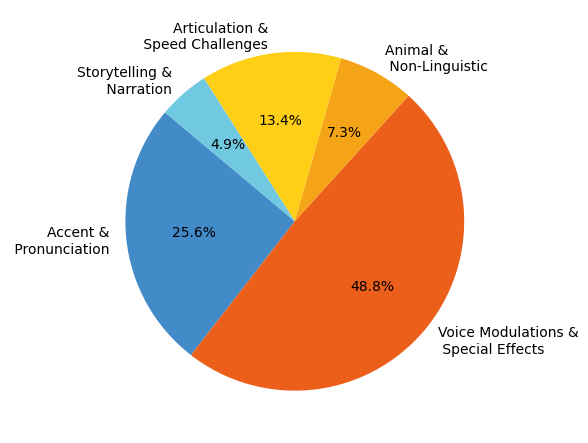

In [12]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = [k.split(":")[0].replace("&", "&\n").replace(" Variations", "").replace(" Sound Imitations", "") for k in category_arr.keys()]
sizes = [len(v) for v in category_arr.values()]
# colors = ['red', 'yellow', 'pink', 'brown', 'orange']  # Custom colors
# I want pastel colors
colors = [ '#438AC9', '#EB5F1A', '#F6A417', '#FECF16', '#70C9E0']
explode = (0.1, 0.1, 0, 0, 0)  # Explode the first slice

# Custom function to format labels inside the pie chart
def custom_label(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))  # Calculate absolute value
    return f"{absolute} ({pct:.1f}%)"  # Format as "Description (xx.x%)"

# Create pie chart
plt.figure(figsize=(5.5, 5.5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)  # shadow=True) # explode=explode,

# Title
# plt.title('SpeakBench Distribution')

# Show the pie chart
plt.show()
# plt.savefig("speakbench_distribution.pdf", format='pdf', bbox_inches='tight')

# Human Eval
- GPT-4o-audio vs Cascade
- Date: 19 Feb 2025

In [13]:
import pandas as pd

In [24]:
human = pd.read_csv("../human_eval_gpt4o_vs_cascade/manual_label_20250219.csv", header=None)
column_names = ["id", "judge_context", "judge_voice", "human_context", "human_voice"]  # Modify as needed
# Assign column names to DataFrame
human.columns = column_names

In [25]:
human

,id,judge_context,judge_voice,human_context,human_voice
0,0,B,A,B,A
1,1,B,B,B,A
2,2,A,A,A,A
3,3,A,A,A,A
4,4,A,B,tie,A
...,...,...,...,...,...
77,77,B,A,A,A
78,78,A,A,tie_bad,tie_bad
79,79,A,B,tie_bad,tie_bad
80,80,A,B,tie_bad,tie_bad


In [47]:
count1_sum = 0
good_ids = []
for category, ids in category_arr.items():
    count1, count_all = 0, 0
    for id in ids:
        label = human.iloc[id]['human_voice']
        assert label in ['A', 'B', 'tie', 'tie_bad']
        if label == 'A' or label == 'tie':
            good_ids.append(id)
            count1 += 1
        count_all += 1
    count1_sum += count1
    print(f"{category}")
    print(f"Count: {count_all}")
    print(f"good_percent: {count1/count_all*100:.2f}%")
    print("-------------------------")
count1_sum

Accent & Pronunciation Variations: Instructions emphasizing regional or language-specific accent differences, pronunciation nuances, or tones.
Count: 21
good_percent: 95.24%
-------------------------
Voice Modulations & Special Effects: Instructions focusing on changing volume, pitch, speed, emotional tone, or adding echoes, glitches, Morse code, reverb, etc.
Count: 40
good_percent: 65.00%
-------------------------
Animal & Non-Linguistic Sound Imitations: Instructions requiring imitation of animal calls or non-verbal sounds such as whistling.
Count: 6
good_percent: 83.33%
-------------------------
Articulation & Speed Challenges: Instructions involving tongue twisters, reversing words, or adjusting speed to highlight clarity and enunciation.
Count: 11
good_percent: 63.64%
-------------------------
Storytelling & Narration: Instructions primarily about telling a story or narrative in a calm, relaxing, or engaging manner, without a strong focus on accent variation.
Count: 4
good_percent

62

In [45]:
len(good_ids)

63

In [42]:
good_ids = sorted(good_ids)

In [43]:
with open("./good_ids_62_82.json", "w") as f:
    json.dump(good_ids, f)